In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
df = pd.read_csv('./data/master_160101_230531.csv')

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
def increase_font_size_by(ax, increase_by):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(item.get_fontsize() + increase_by)

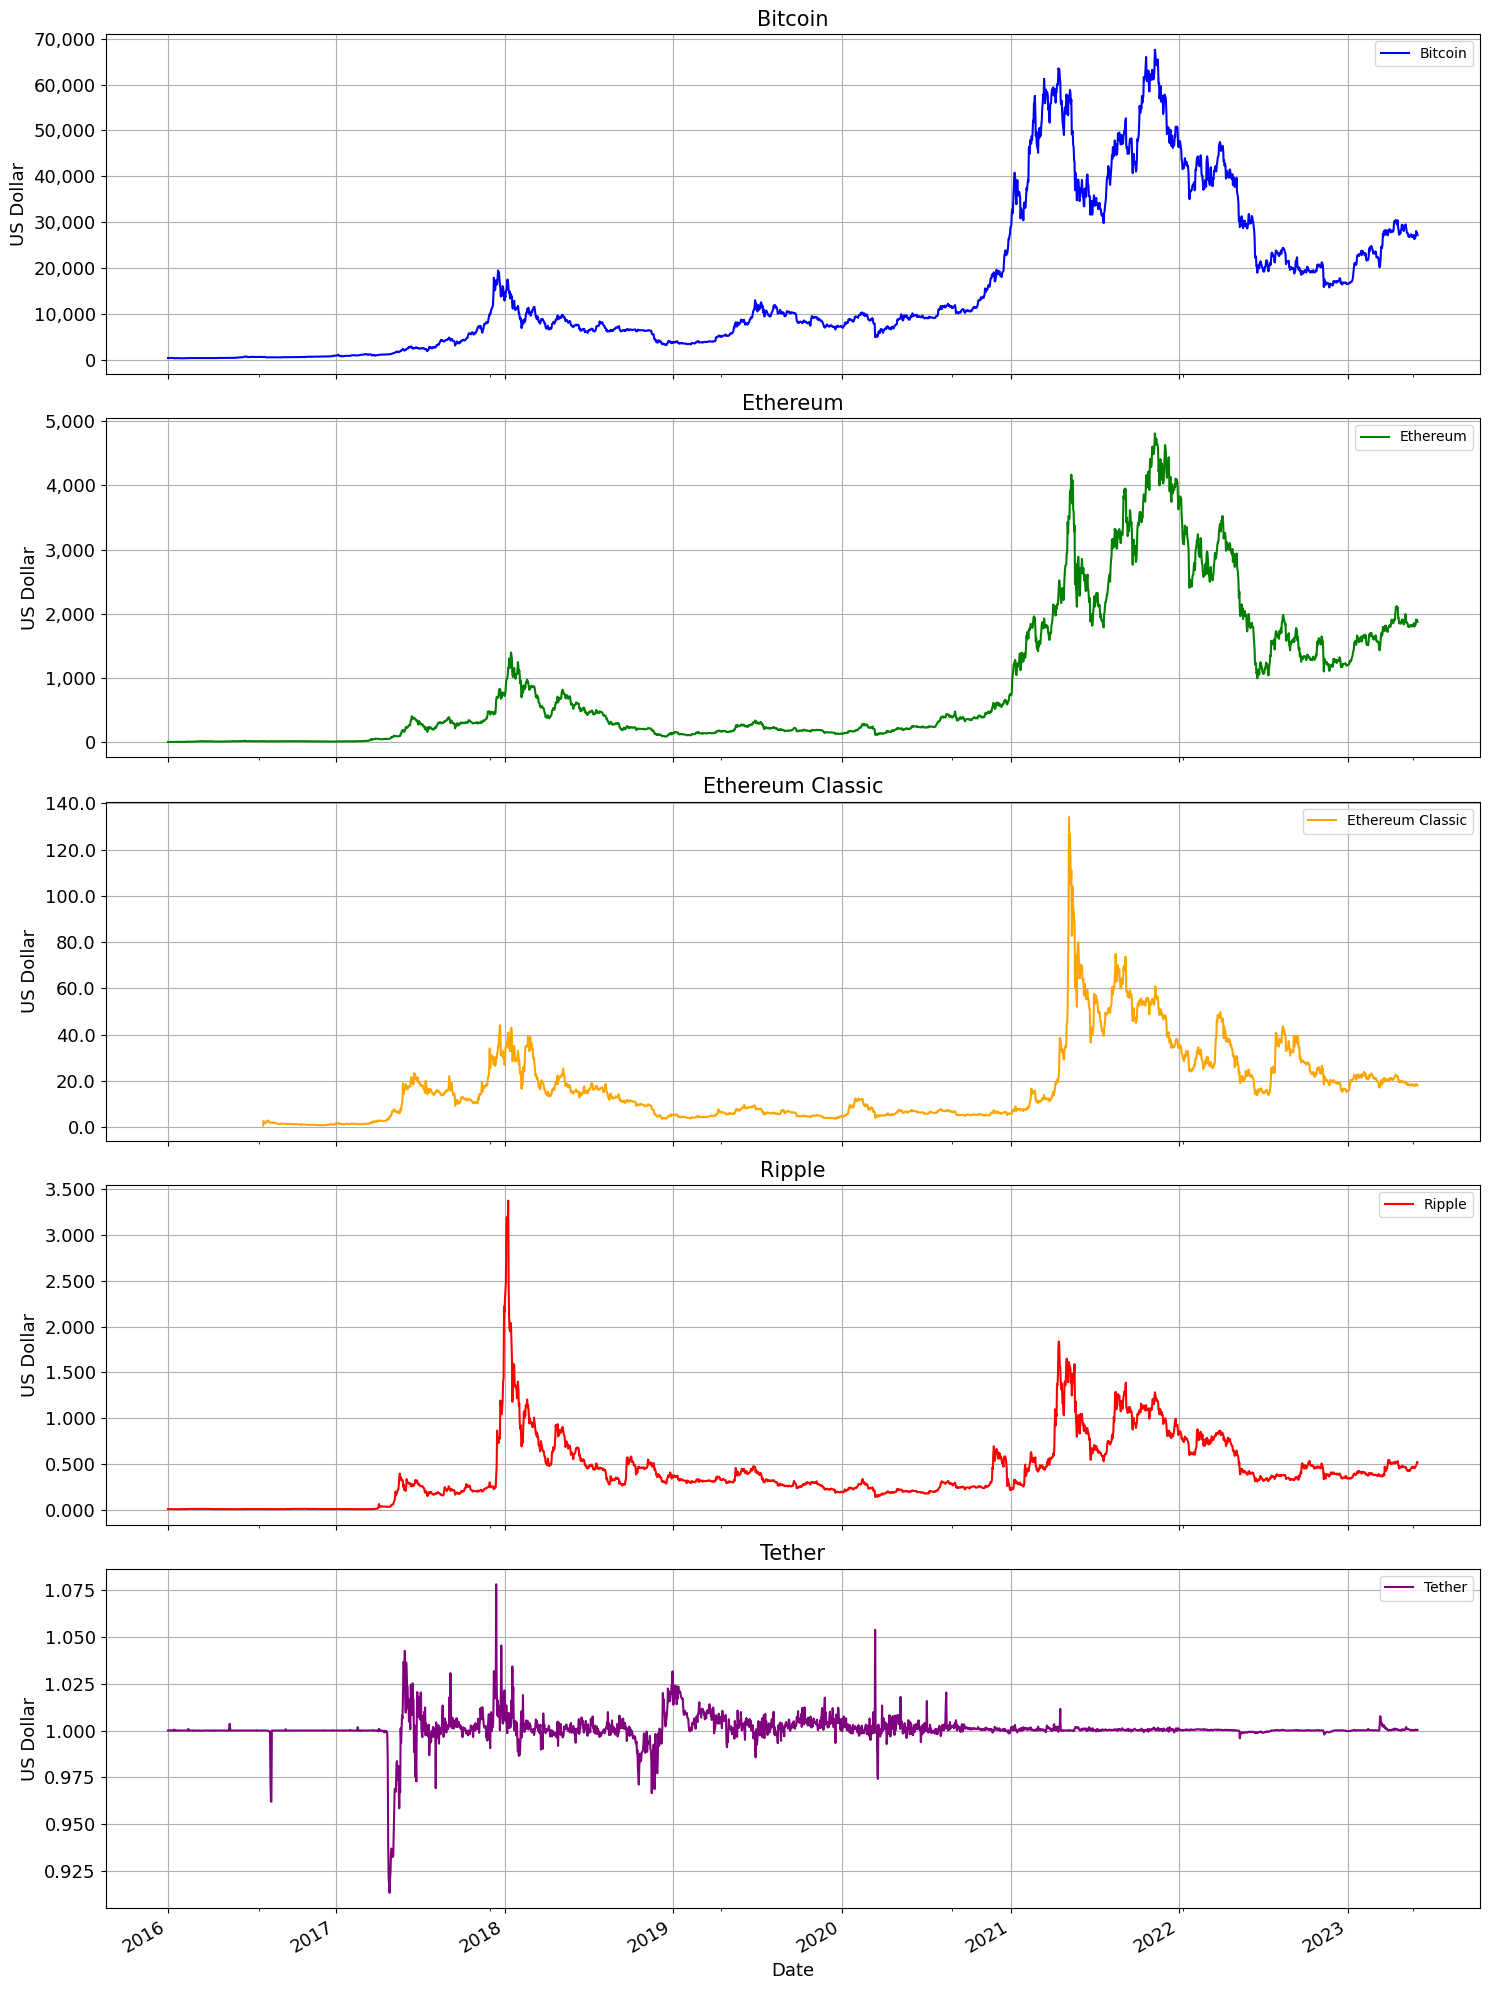

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

cryptos = ['Bitcoin', 'Ethereum', 'Ethereum Classic', 'Ripple', 'Tether']
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, axes = plt.subplots(nrows=5, figsize=(15, 20), sharex=True)

for ax, crypto, color in zip(axes, cryptos, colors):
    df.plot(x='Date', y=crypto, ax=ax, title=crypto, color=color)
    ax.set_ylabel('US Dollar')
    ax.grid(True)
    if crypto == 'Ethereum Classic':
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.1f}".format(x)))
    elif crypto in ['Ripple', 'Tether']:
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.3f}".format(x)))
    else:
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
    increase_font_size_by(ax, 3)

plt.tight_layout()
plt.show()

In [14]:
df

,Date,Bitcoin,Ethereum,Ethereum Classic,Ripple,Tether
0,2016-01-01 23:59:59,434.33,0.95,NaN,0.01,1.00
1,2016-01-02 23:59:59,433.44,0.94,NaN,0.01,1.00
2,2016-01-03 23:59:59,430.01,0.97,NaN,0.01,1.00
3,2016-01-04 23:59:59,433.09,0.95,NaN,0.01,1.00
4,2016-01-05 23:59:59,431.96,0.95,NaN,0.01,1.00
...,...,...,...,...,...,...
2703,2023-05-27 23:59:59,"26,868.35","1,831.12",18.18,0.47,1.00
2704,2023-05-28 23:59:59,"28,085.65","1,910.91",18.55,0.48,1.00
2705,2023-05-29 23:59:59,"27,745.88","1,893.08",18.37,0.49,1.00
2706,2023-05-30 23:59:59,"27,702.35","1,901.03",18.27,0.52,1.00


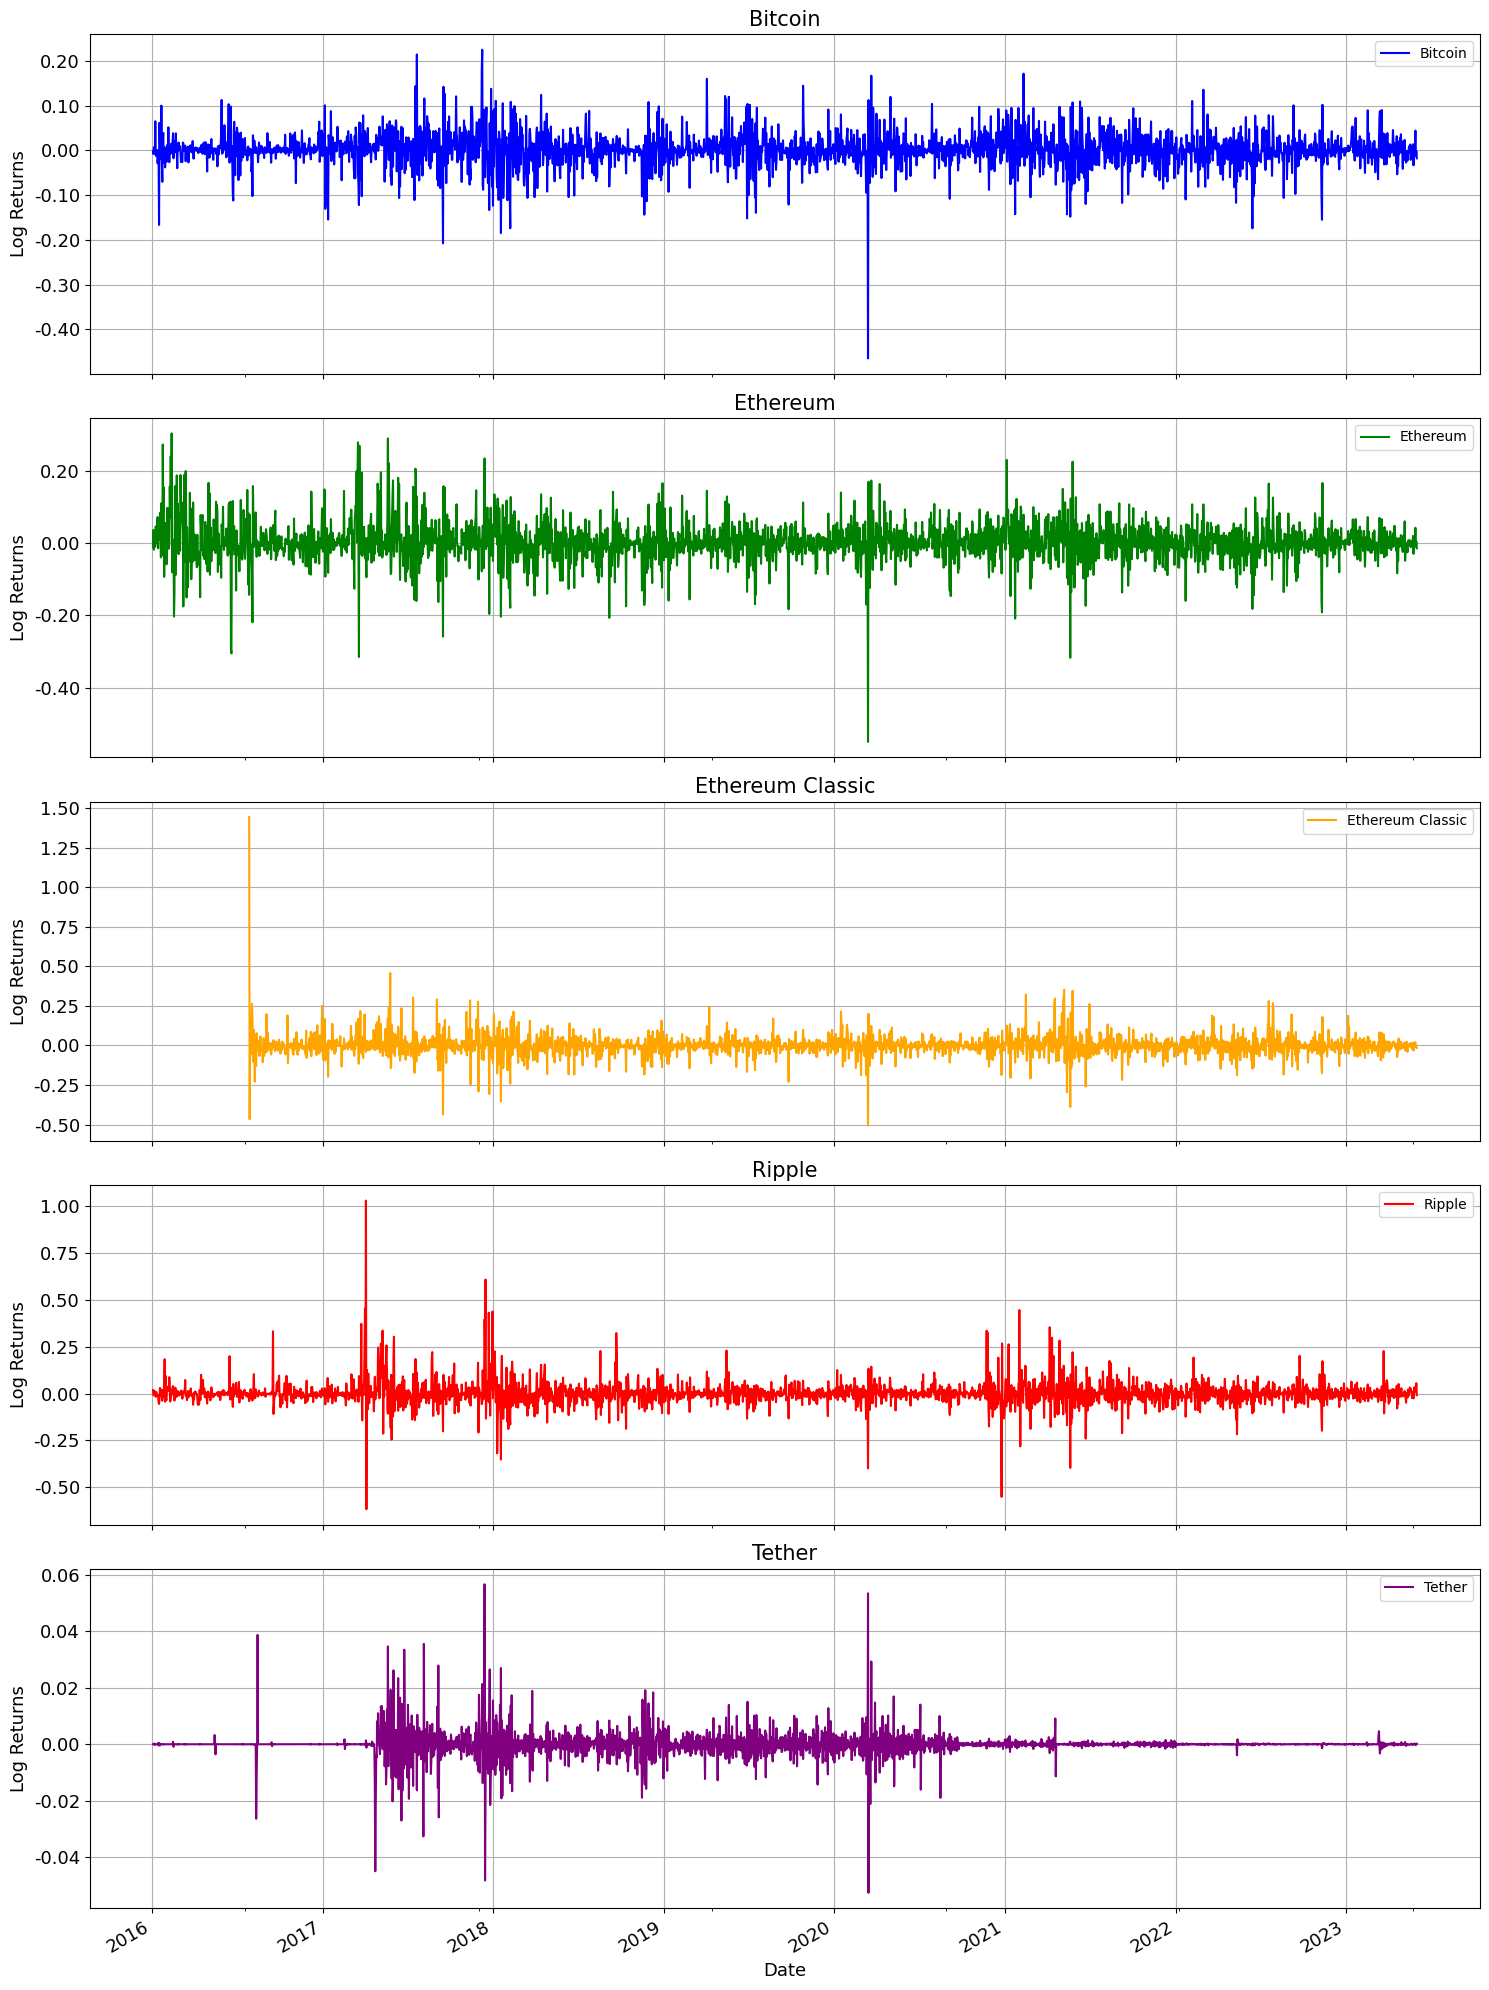

In [22]:
log_returns = np.log(df[cryptos] / df[cryptos].shift(1))
log_returns['Date'] = df['Date']

fig, axes = plt.subplots(nrows=5, figsize=(15, 20), sharex=True)

for ax, crypto, color in zip(axes, cryptos, colors):
    log_returns.plot(x='Date', y=crypto, ax=ax, title=crypto, color=color)
    ax.set_ylabel('Log Returns')
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))
    ax.grid(True)
    increase_font_size_by(ax, 3)

plt.tight_layout()
plt.show()